In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [14]:
from lib.fit_model import FitModel
from lib.split_data import SplitData

In [15]:
df = pd.read_csv('./data/hmnist_28_28_L.csv')

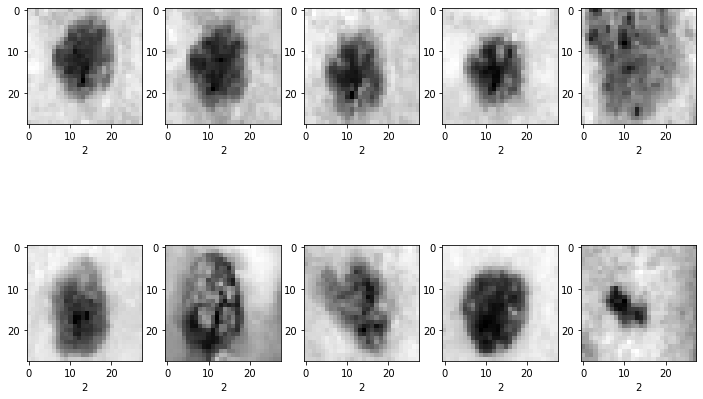

In [45]:
plt.figure(figsize=(12,8))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(np.array(df)[i+1000][:-1].reshape(28,28), interpolation='nearest',cmap='gray')
    plt.xlabel(str(np.array(df)[i+1000][784]))

In [46]:
X_train,X_test,y_train,y_test = SplitData(df)

In [47]:
ann_model = nn.Sequential(
    nn.Linear(X_train.shape[1],128),
    nn.ReLU(),
    nn.Linear(128,256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,7),
    nn.Softmax(dim=-1)
)
optimizer = torch.optim.Adam(ann_model.parameters(),lr=1e-6)
criterion = torch.nn.CrossEntropyLoss()


In [48]:
FitModel(X_train,X_test,y_train,y_test,model=ann_model,criterion=criterion,optimizer=optimizer,epoch=10,batch_size=64)

EPOCH     0 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
EPOCH     1 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
EPOCH     2 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
EPOCH     3 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
EPOCH     4 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
EPOCH     5 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
EPOCH     6 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
EPOCH     7 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
EPOCH     8 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
EPOCH     9 | TRAIN ACC: 66.82% | VAL ACC: 67.45% |
